In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans

# EDA: Citibike Trips

In [2]:
trips = pd.read_parquet("201707-citibike-tripdata.parquet")
trips.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,75319.000000,100000.000000
mean,1.443573e+03,1464.267370,40.735498,-73.984099,1454.93331,40.734973,-73.984630,22853.967960,1979.319375,0.973700
std,1.982778e+04,1372.691175,0.030510,0.018102,1369.97110,0.030265,0.018087,4971.652132,11.831651,0.687919
min,6.100000e+01,72.000000,40.661063,-74.017134,72.00000,40.655949,-74.017134,14529.000000,1885.000000,0.000000
25%,4.160000e+02,365.000000,40.715338,-73.997236,363.00000,40.714979,-73.997901,18127.000000,1971.000000,0.000000
50%,7.640000e+02,497.000000,40.734546,-73.986580,496.00000,40.734546,-73.987030,24922.000000,1982.000000,1.000000
75%,1.351000e+03,3159.000000,40.759291,-73.973715,3158.00000,40.757570,-73.973747,27626.000000,1988.000000,1.000000
max,2.477222e+06,3474.000000,40.804213,-73.929891,3474.00000,40.804213,-73.929891,29832.000000,2001.000000,2.000000


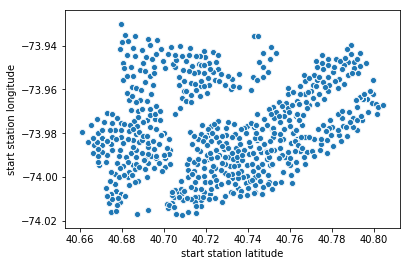

In [3]:
sns.scatterplot(data=trips, x='start station latitude', y='start station longitude'); plt.show()

# DBSCAN (I)

In [43]:
X = trips[['start station latitude', 'start station longitude']]
est = DBSCAN(eps=0.004, min_samples=3, metric="euclidean").fit(X)
labels = est.labels_

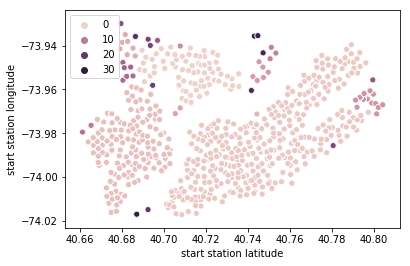

In [44]:
sns.scatterplot(x=X['start station latitude'], y=X['start station longitude'], hue=labels);plt.show()

# DBSCAN (II)

In [54]:
X = trips[['start station latitude', 'start station longitude']]

est = DBSCAN(eps=0.007, min_samples=3, metric="euclidean").fit(X)
labels = est.labels_

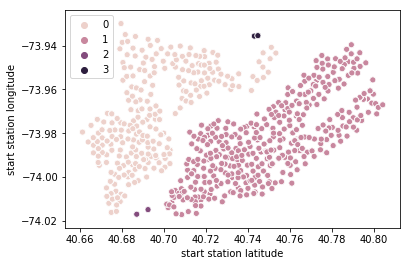

In [55]:
sns.scatterplot(x=X['start station latitude'], y=X['start station longitude'], hue=labels); plt.show()

# K-Means is not working in this case

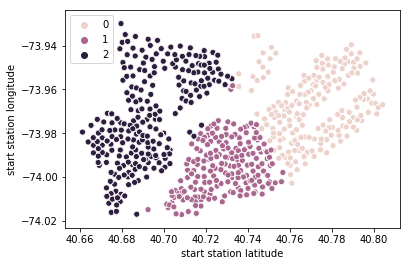

In [51]:
est = KMeans(3).fit(X)
sns.scatterplot(x=X['start station latitude'], y=X['start station longitude'], hue=est.labels_); plt.show()

In [56]:
# for further details see: https://chih-ling-hsu.github.io/2018/01/02/clustering-python

In [4]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
X = df.iloc[:, :7]
X.dropna(inplace=True)
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [6]:
est = KMeans(3).fit(X)
df_viz = df.dropna().copy()
df_viz['cluster'] = est.labels_

C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\peer.kueppers\AppData\Roaming\Python\Python36\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: inva

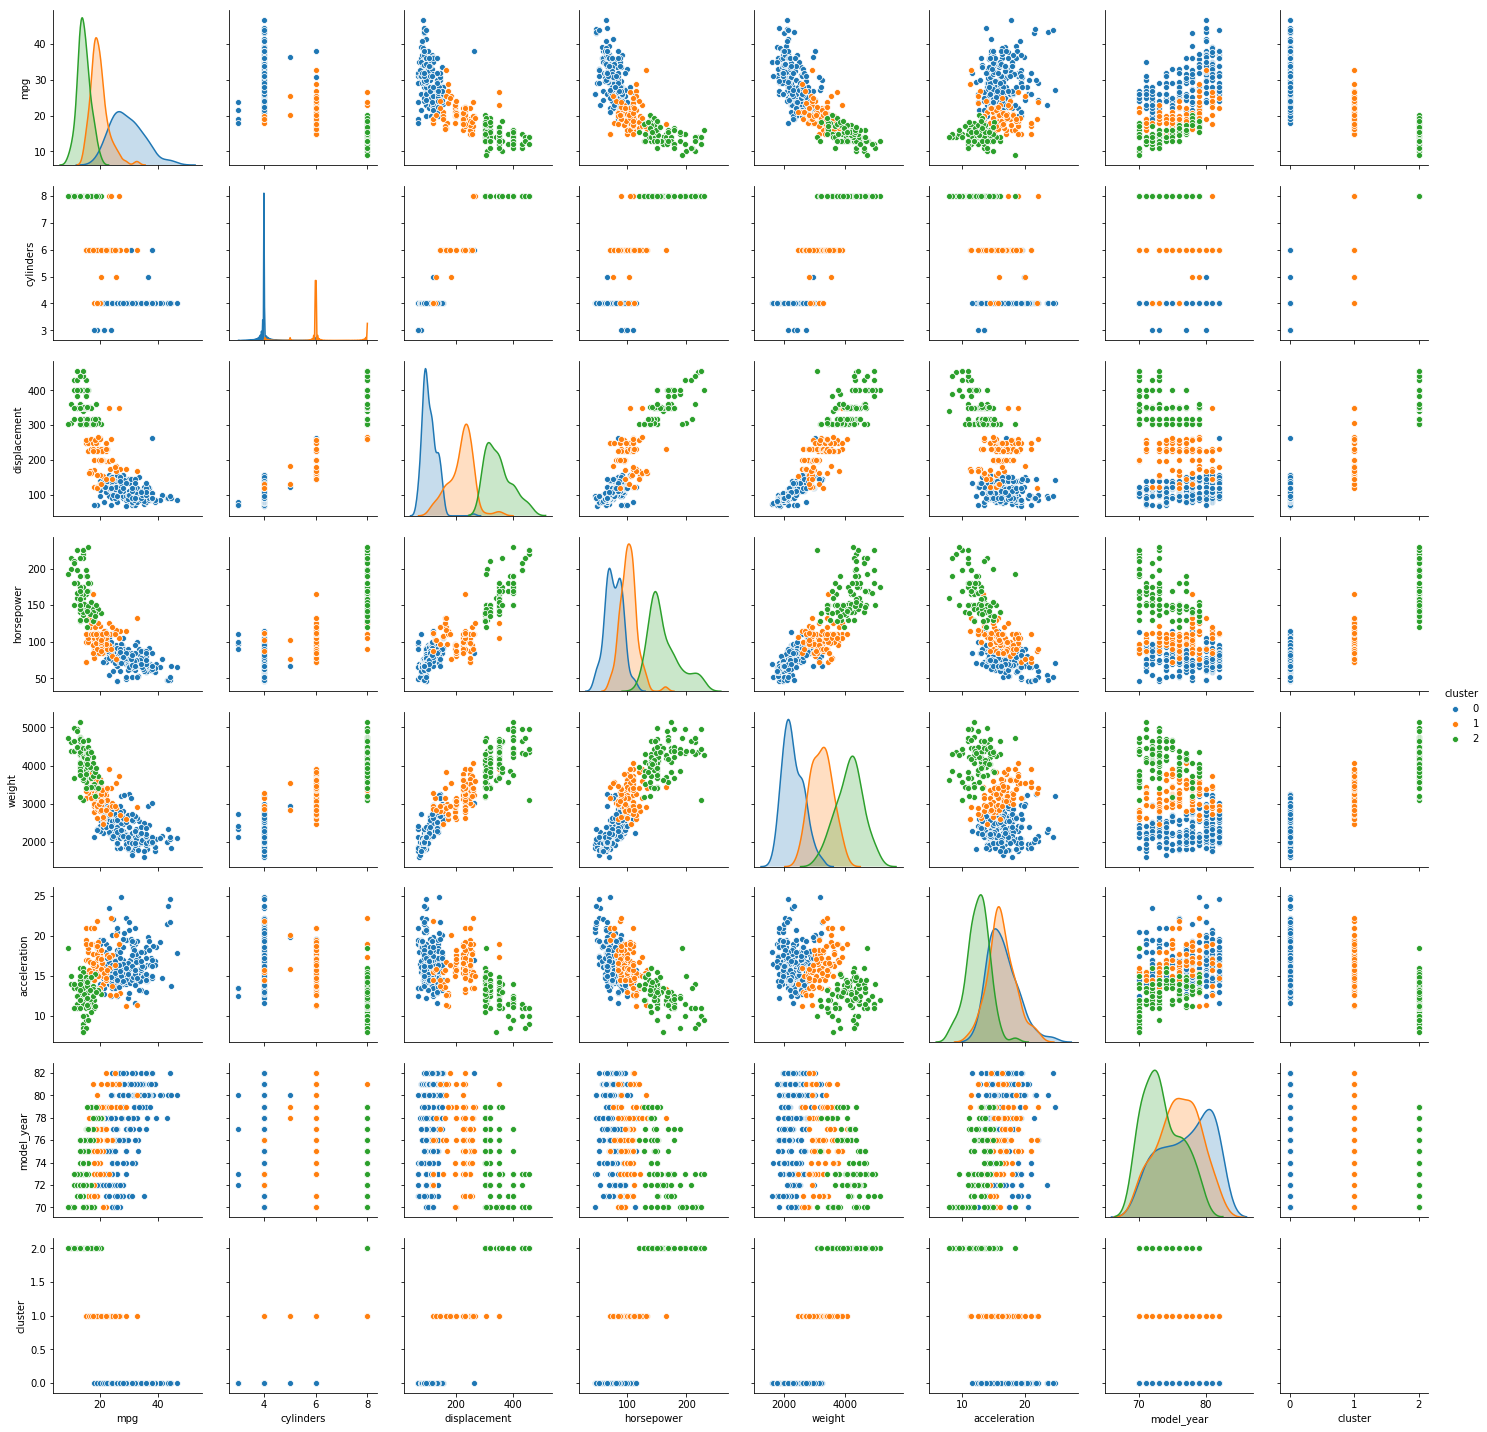

In [7]:
sns.pairplot(data=df_viz, hue='cluster')